[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://drive.google.com/file/d/1OD33ipoVqcm0vB8hTCoXXznzNumKZUUB/view?usp=sharing)

## Install dependencies

In [1]:
!pip install likelihood --quiet


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import warnings

warnings.filterwarnings("ignore")
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from likelihood.tools import *

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Install gdown

In [3]:
!pip install gdown --quiet


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Download the file in google drive using Python

In [6]:
import gdown

url = "https://docs.google.com/spreadsheets/d/1JQAtAUuekRv5AUM_oMECtz3KQoK7dfWF/edit?usp=drive_link&ouid=101938281242055918499&rtpof=true&sd=true"
output_path = "./data/raw/Rest_Mex_Sentiment_Analysis_2023_Train.xlsx"
gdown.download(url, output_path, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1JQAtAUuekRv5AUM_oMECtz3KQoK7dfWF
To: c:\Users\userpopti-03\Desktop\GitHub\Overview-Rest-Mex-2023\notebooks\data\raw\Rest_Mex_Sentiment_Analysis_2023_Train.xlsx
100%|██████████| 45.8M/45.8M [00:03<00:00, 11.9MB/s]


'./data/raw/Rest_Mex_Sentiment_Analysis_2023_Train.xlsx'

## EDA - Exploratory Data Analysis

In [2]:
# Add dataset path
path = "./data/"
folder = "raw/"
filename = "Rest_Mex_Sentiment_Analysis_2023_Train.xlsx"
# reading the data
df = pd.read_excel(path + folder + filename)
print(f"Total size : ", "{:,}".format(len(df)))
print("-------------------------------------------------------")
print(f"Calculating the percentage of missing values by column")
cal_missing_values(df)
print("-------------------------------------------------------")

Total size :  251,702
-------------------------------------------------------
Calculating the percentage of missing values by column
Total size :  251,702
Title : 0.00%
Review : 0.00%
Polarity : 0.00%
Country : 0.00%
Type : 0.00%
-------------------------------------------------------


In [3]:
# Checking the data type
df.dtypes

Title       object
Review      object
Polarity     int64
Country     object
Type        object
dtype: object

In [4]:
print(f"The values of the first 5 rows are : ")
df.head()

The values of the first 5 rows are : 


,Title,Review,Polarity,Country,Type
0,LINDA EXPERIENCIA,Hermoso lugar para admirar las obras de Botero...,5,Colombia,Attractive
1,Plaza típca,No puedes dejar pasar sus vistas y arquitectur...,5,Cuba,Attractive
2,Tres días en La Habana,Este es un hotel lleno de historia y carácter....,4,Cuba,Hotel
3,Recomendado,"Justo lo que buscaba. Sabores exoticos, buena ...",5,Colombia,Restaurant
4,Caro pero vale la pena,"La comida es muy buena, desde las entradas has...",4,Mexico,Restaurant


### Distribution of labels

Descriptive statistics of the data set by column.
-------------------------------------------------------


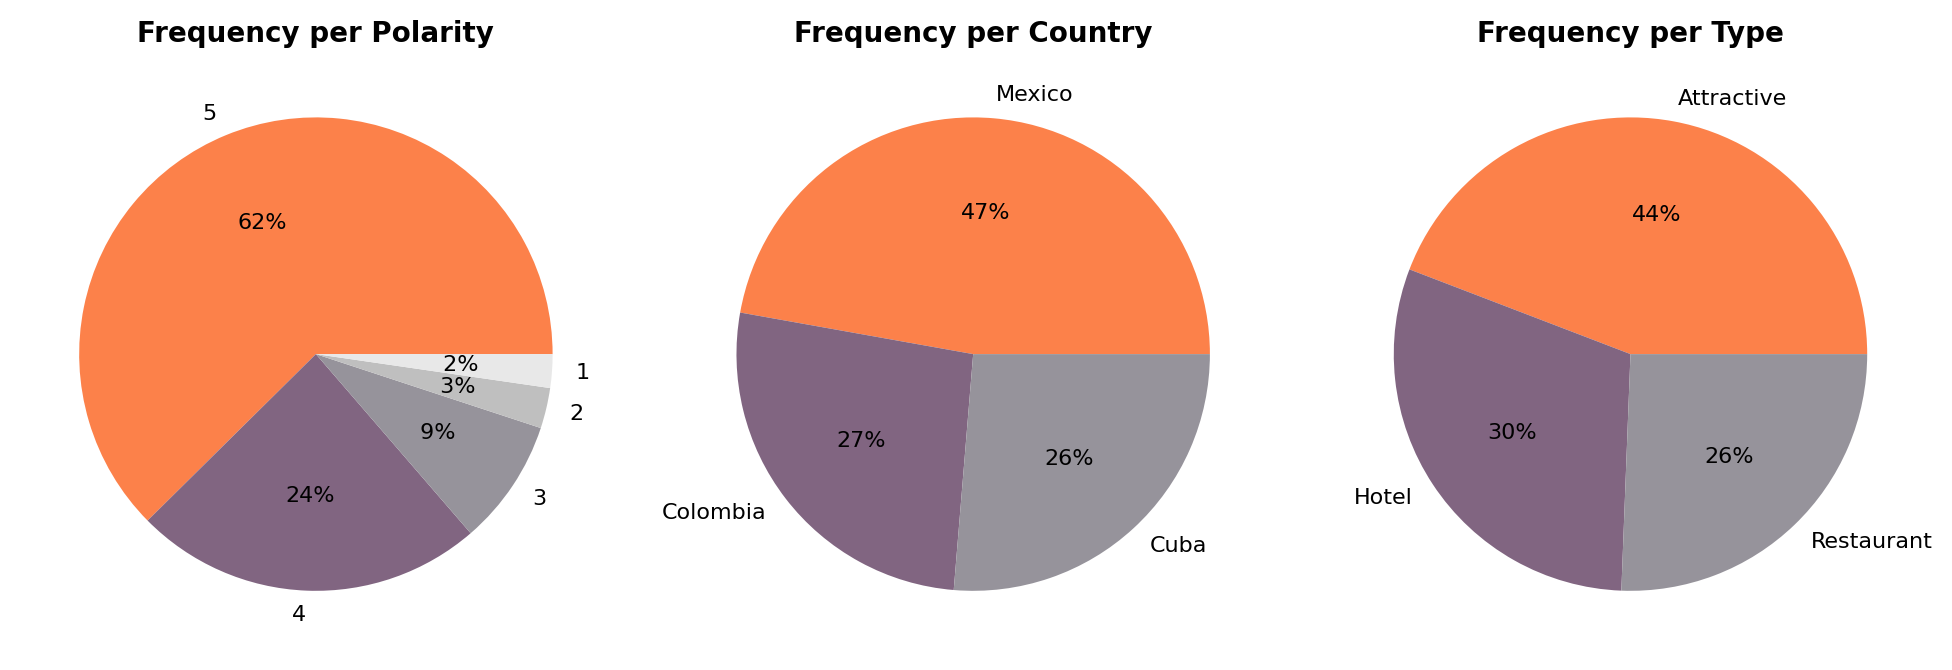

In [5]:
# pallete that will be used throughout analysis in graphs
palette = ["#FC814A", "#816581", "#96939B", "#BFBFBF", "#E8E8E8"]
countries = tuple(df["Country"].unique())
types = df["Type"].unique()
polarities = df["Polarity"].unique()

print(f"Descriptive statistics of the data set by column.")
print("-------------------------------------------------------")
plt.figure(figsize=(10, 5))
for i, col in enumerate(df[["Polarity", "Country", "Type"]].columns):
    ax = plt.subplot(1, 3, i + 1)
    df[col].value_counts().plot.pie(autopct="%2.f%%", textprops={"size": 8}, colors=palette)
    plt.title("Frequency per " + col, fontsize=10, fontweight="bold")
    plt.ylabel(None)

plt.tight_layout()
plt.savefig("./images/pie-plot.jpg", dpi=300)
plt.show()

Descriptive statistics of the dataset by category.
-------------------------------------------------------
Polarity 5
-------------------------------------------------------


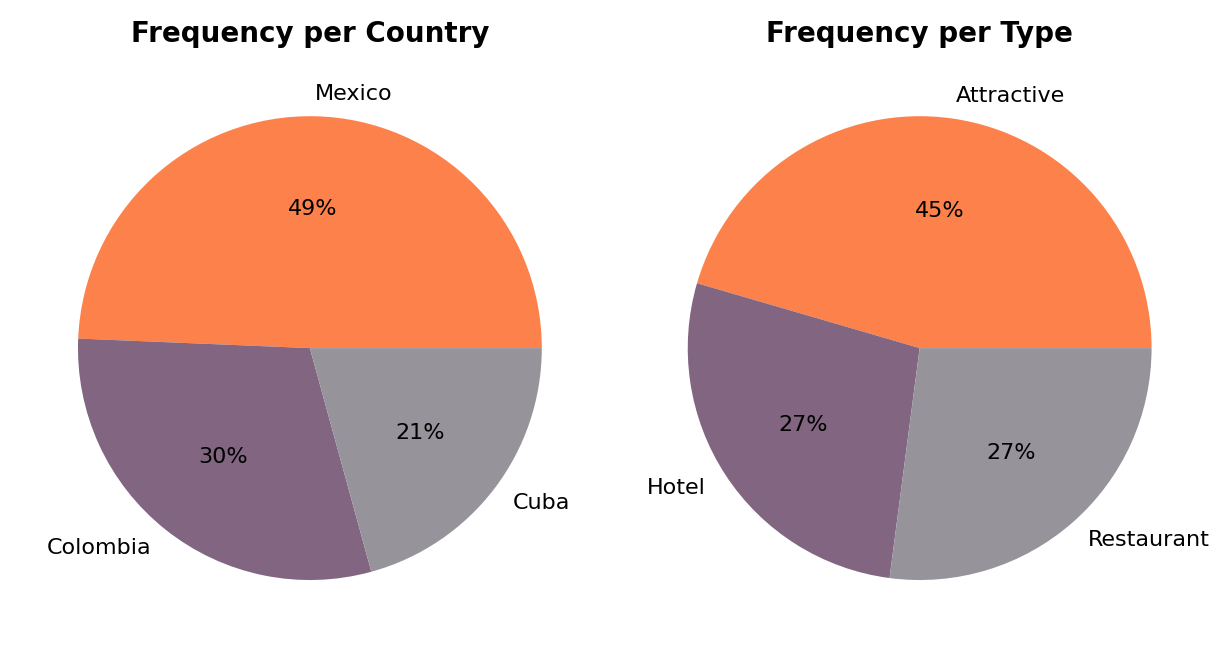

Polarity 4
-------------------------------------------------------


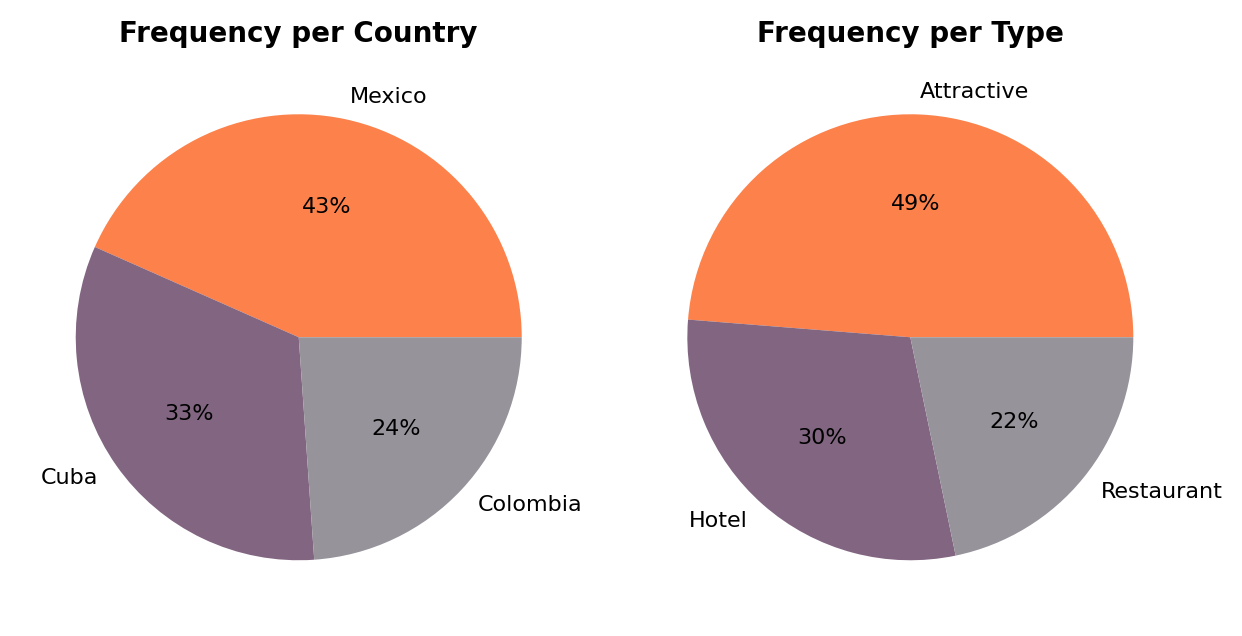

Polarity 3
-------------------------------------------------------


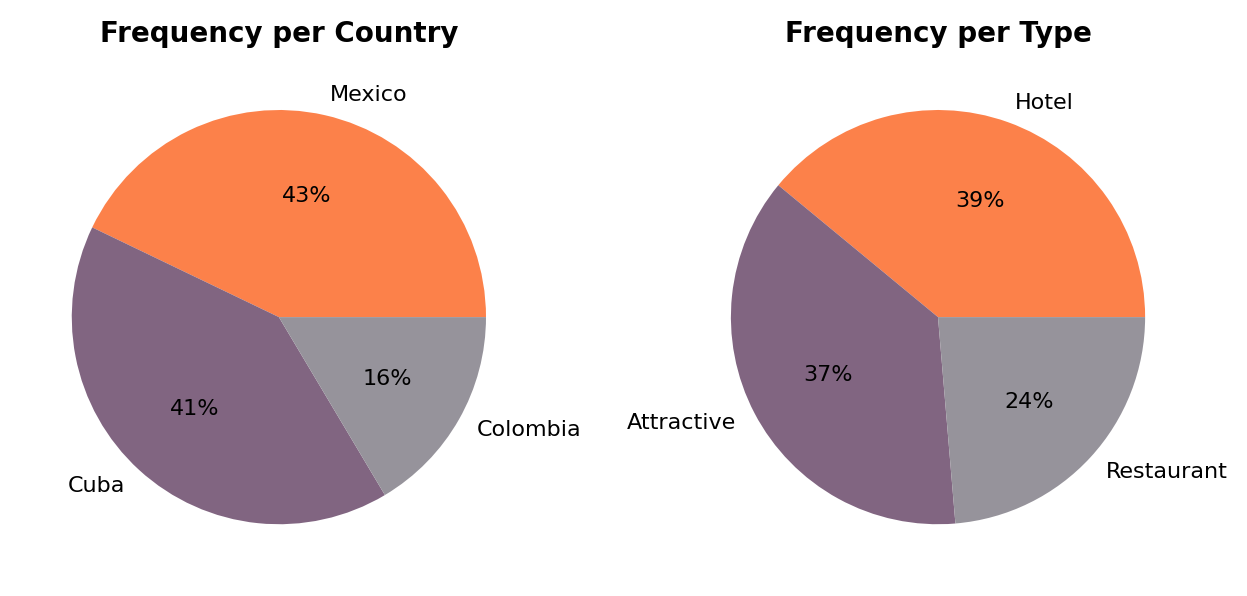

Polarity 1
-------------------------------------------------------


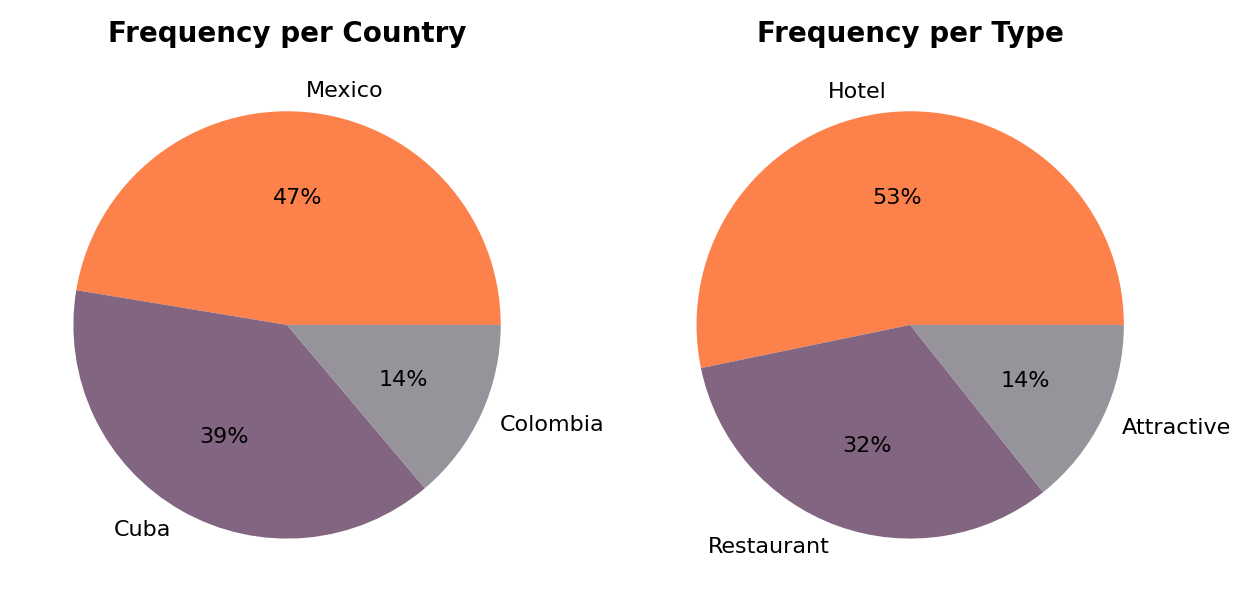

Polarity 2
-------------------------------------------------------


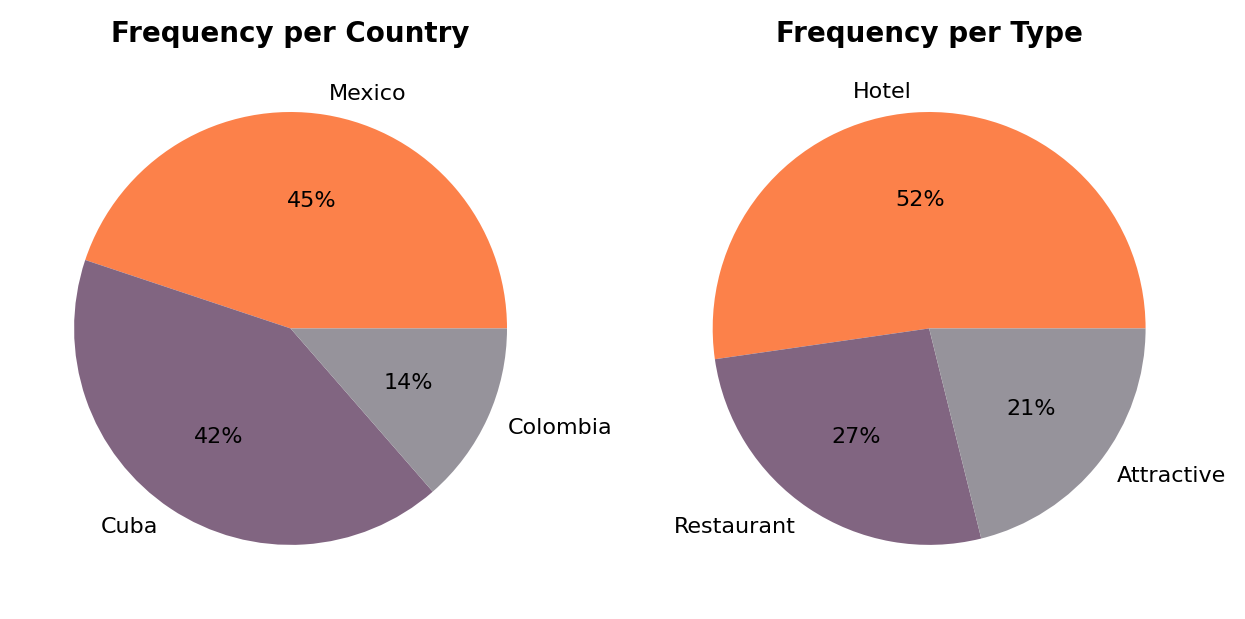

In [6]:
sub = df[["Polarity", "Country", "Type"]].copy()

print(f"Descriptive statistics of the dataset by category.")
print("-------------------------------------------------------")
for j in polarities:
    temp = (sub.where(sub["Polarity"] == j)).dropna()
    temp = temp[["Country", "Type"]]
    print(f"Polarity {j}")
    print("-------------------------------------------------------")
    for i, col in enumerate(temp.columns):
        ax = plt.subplot(1, 2, i + 1)
        temp[col].value_counts().plot.pie(autopct="%2.f%%", textprops={"size": 8}, colors=palette)
        plt.title(f"Frequency per " + col, fontsize=10, fontweight="bold")
        plt.ylabel(None)

    plt.tight_layout()
    plt.show()

sub["Count"] = 1
sub_bycountry = (
    sub[["Polarity", "Country", "Count"]].groupby(["Polarity", "Country"]).count()
).reset_index()
sub_bytype = (
    sub[["Polarity", "Type", "Count"]].groupby(["Polarity", "Type"]).count()
).reset_index()

### Length of text

In [7]:
lengths = df["Review"].str.len()

review_lenghts = pd.DataFrame({"Polarity": df["Polarity"], "length": lengths})

In [8]:
print(f"The values of the first 5 rows are : ")
review_lenghts.head()

The values of the first 5 rows are : 


,Polarity,length
0,5,150.0
1,5,145.0
2,4,784.0
3,5,131.0
4,4,202.0


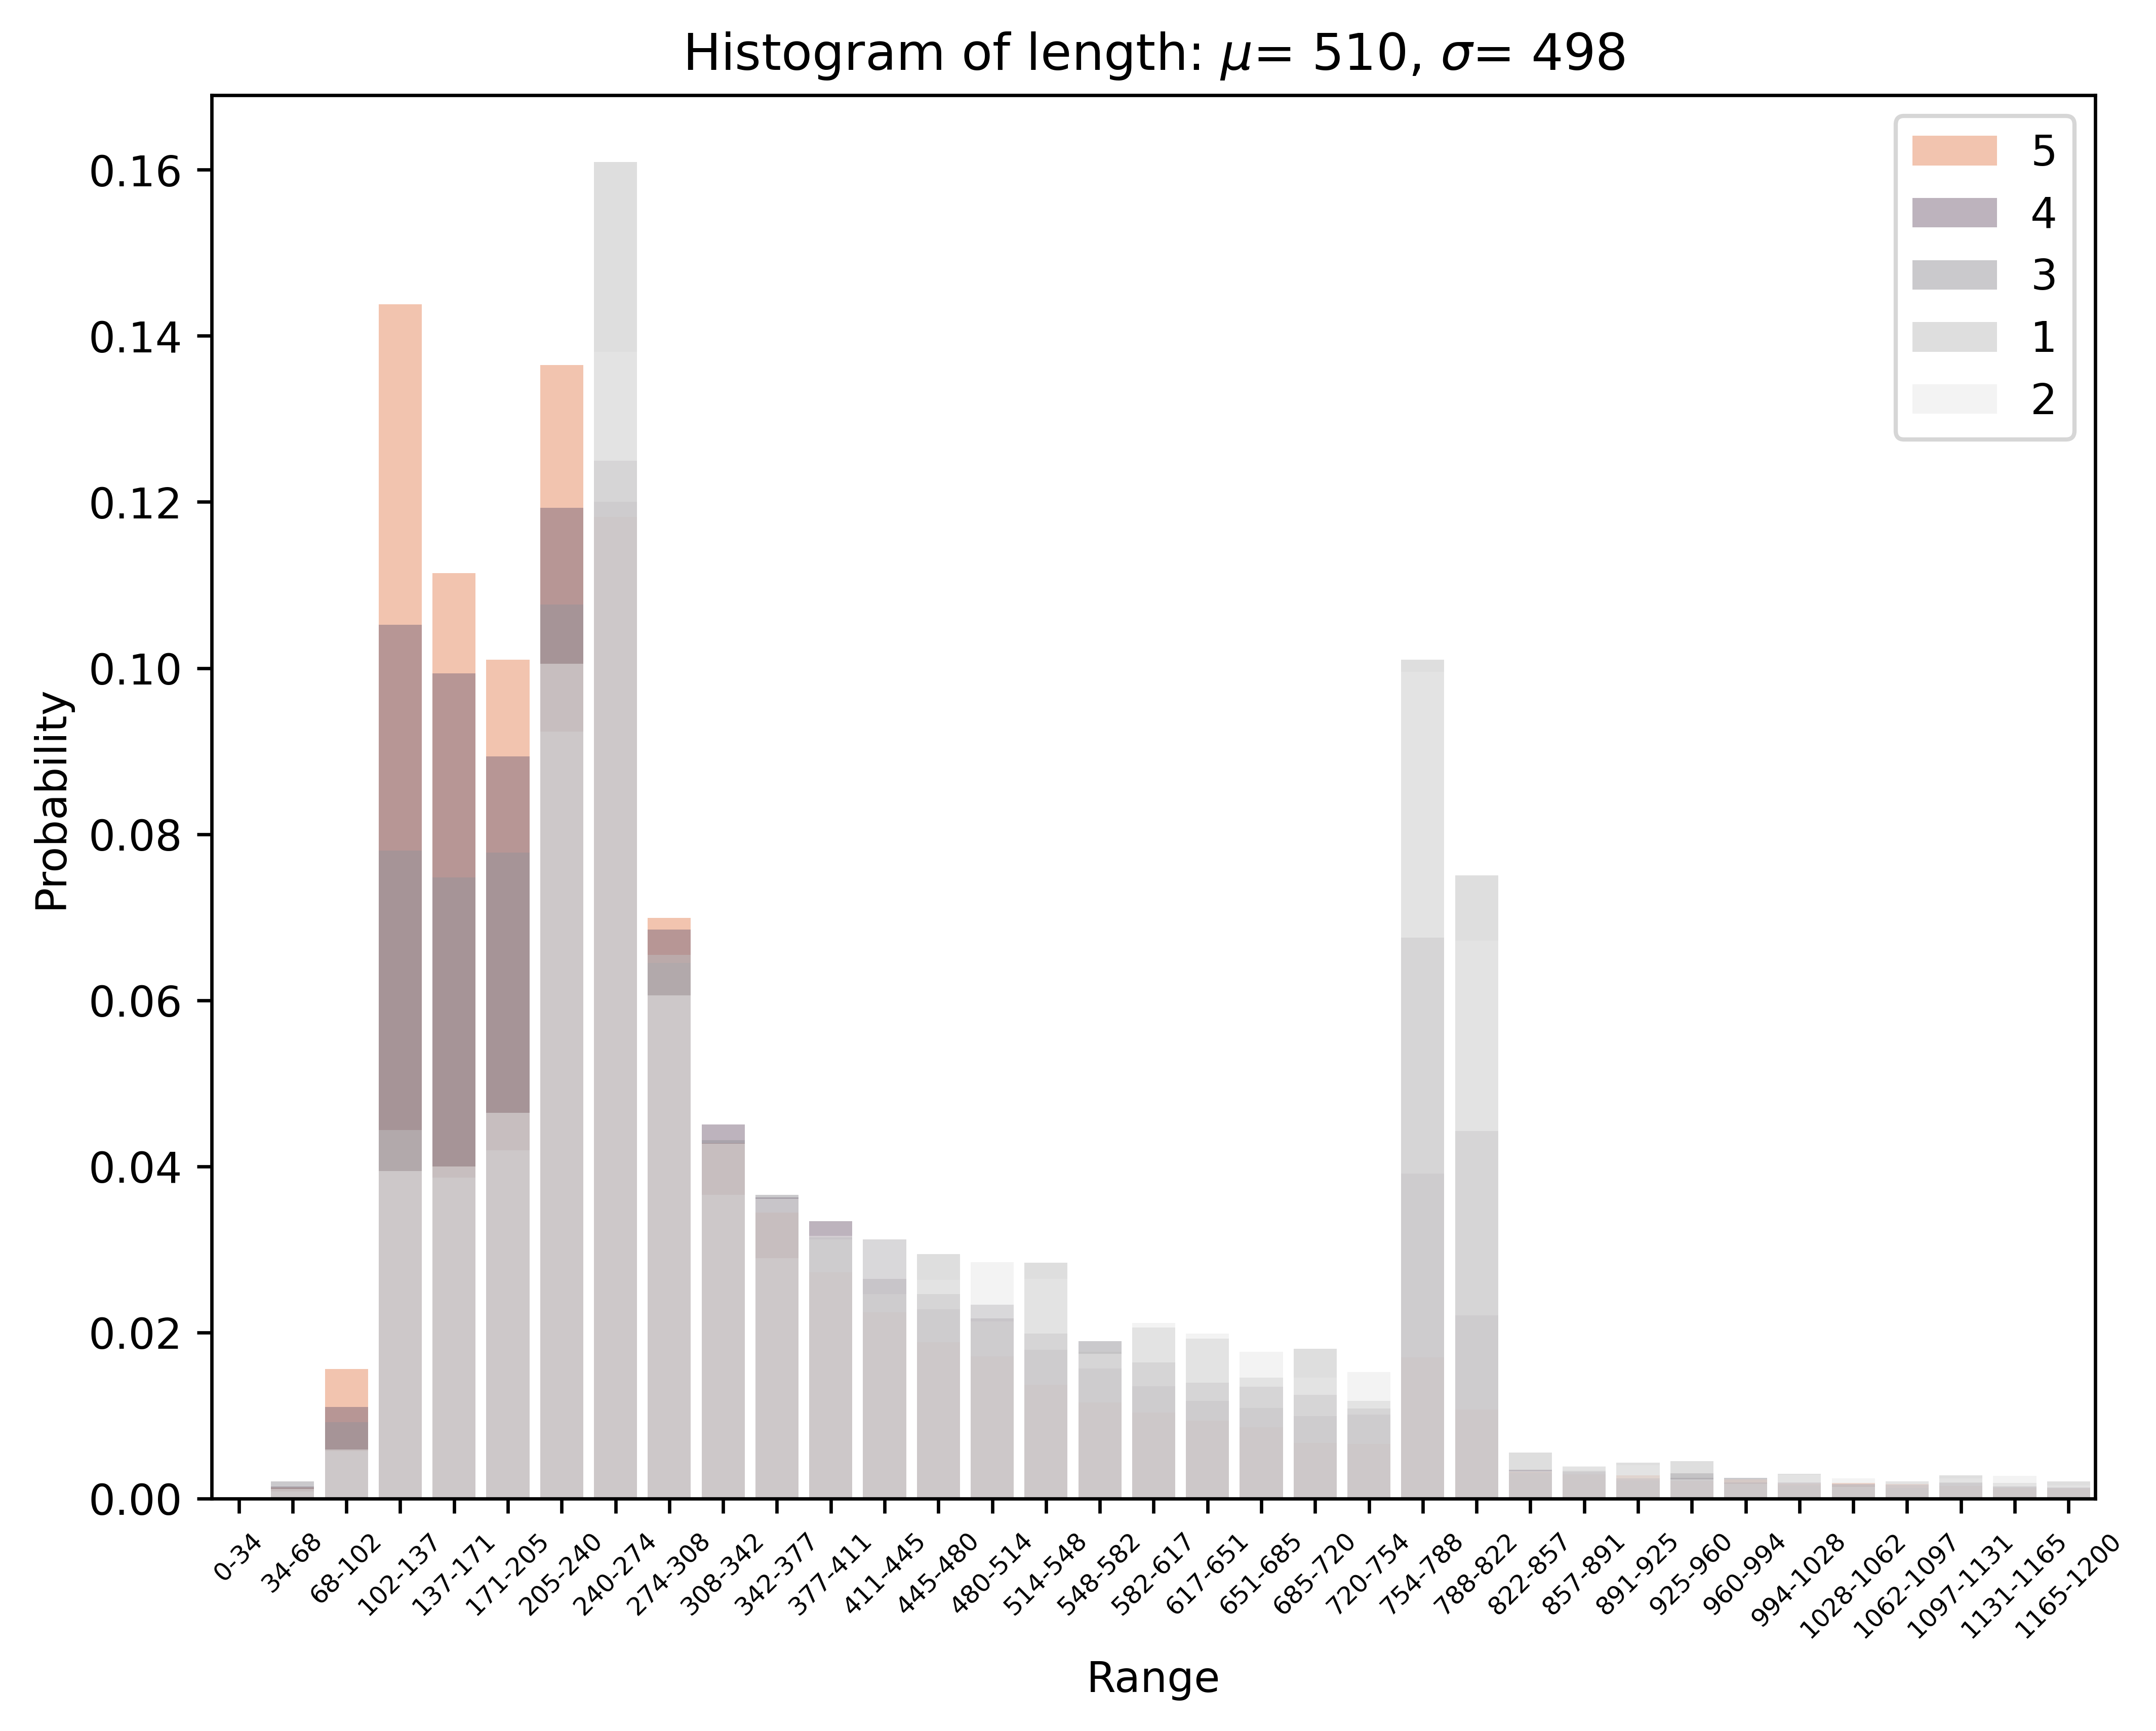

In [9]:
fig = plt.figure(dpi=300, figsize=(8, 6))
ax = fig.gca()
xs = list(zip(polarities, palette))

for label, color in xs:
    lengths = review_lenghts[review_lenghts["Polarity"] == label]
    values, bins = np.histogram(lengths["length"], range=(0, 1200), bins=35)
    y = (bins[1:] + bins[:-1]) / 2
    sns.barplot(x=y, y=values / len(lengths), label=label, color=color, ax=ax, alpha=0.5)

ax.set_xticklabels(
    [f"{int(_y)}-{int(_x)}" for _x, _y in zip(bins[1:], bins[:-1])], rotation=45, fontsize=6
)
sig = int(np.std(lengths["length"]))
mn = int(np.mean(lengths["length"]))
ax.set_title(f"Histogram of length: $\mu$= {mn}, $\sigma$= {sig}")
ax.set_xlabel("Range")
ax.set_ylabel("Probability")
ax.legend()
plt.savefig("./images/hist-plot.jpg", dpi=300)
plt.show()